In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Grapevine_Leaves_Image_Dataset_Citation_Request.txt
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (20).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (16).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (79).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (55).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (53).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (23).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (42).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (72).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Im

IMPORTING LIBRAREIS

In [2]:
!pip install split-folders
import pandas as pd
import numpy as np
import os
import cv2
import splitfolders
import glob as gb
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Load data

In [3]:
# Load the data
data = os.listdir("/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset")
data

['Buzgulu',
 'Ala_Idris',
 'Nazli',
 'Grapevine_Leaves_Image_Dataset_Citation_Request.txt',
 'Dimnit',
 'Ak']

In [4]:
path_main = "/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset"
for folder in os.listdir(path_main):
    folder_path=os.path.join(path_main,folder)
    if os.path.isdir(folder_path):
        list_of_elements = os.listdir(os.path.join(path_main,folder))
            #files = gb.glob(pathname= str(path_main + folder +"/*.png"))
        print(f"Number of elements , found {len(list_of_elements)} in folder {folder}")
 
    else:
        print(f"{folder_path} is not a directory")

Number of elements , found 100 in folder Buzgulu
Number of elements , found 100 in folder Ala_Idris
Number of elements , found 100 in folder Nazli
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Grapevine_Leaves_Image_Dataset_Citation_Request.txt is not a directory
Number of elements , found 100 in folder Dimnit
Number of elements , found 100 in folder Ak


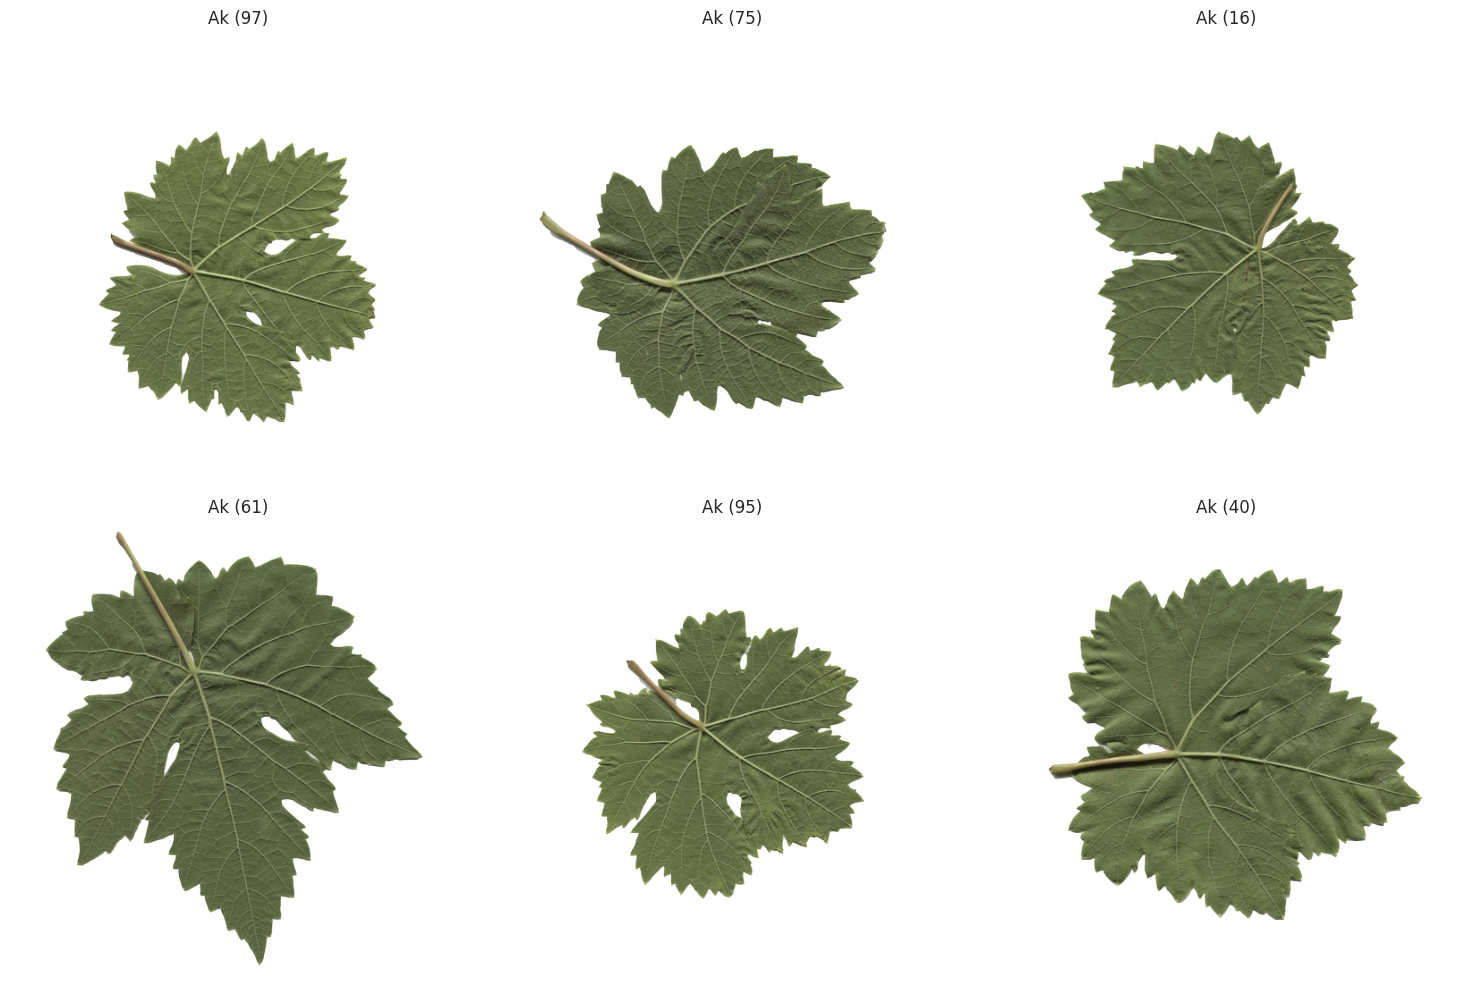

In [5]:
# Path to the directory containing images
path = "/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Ak"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

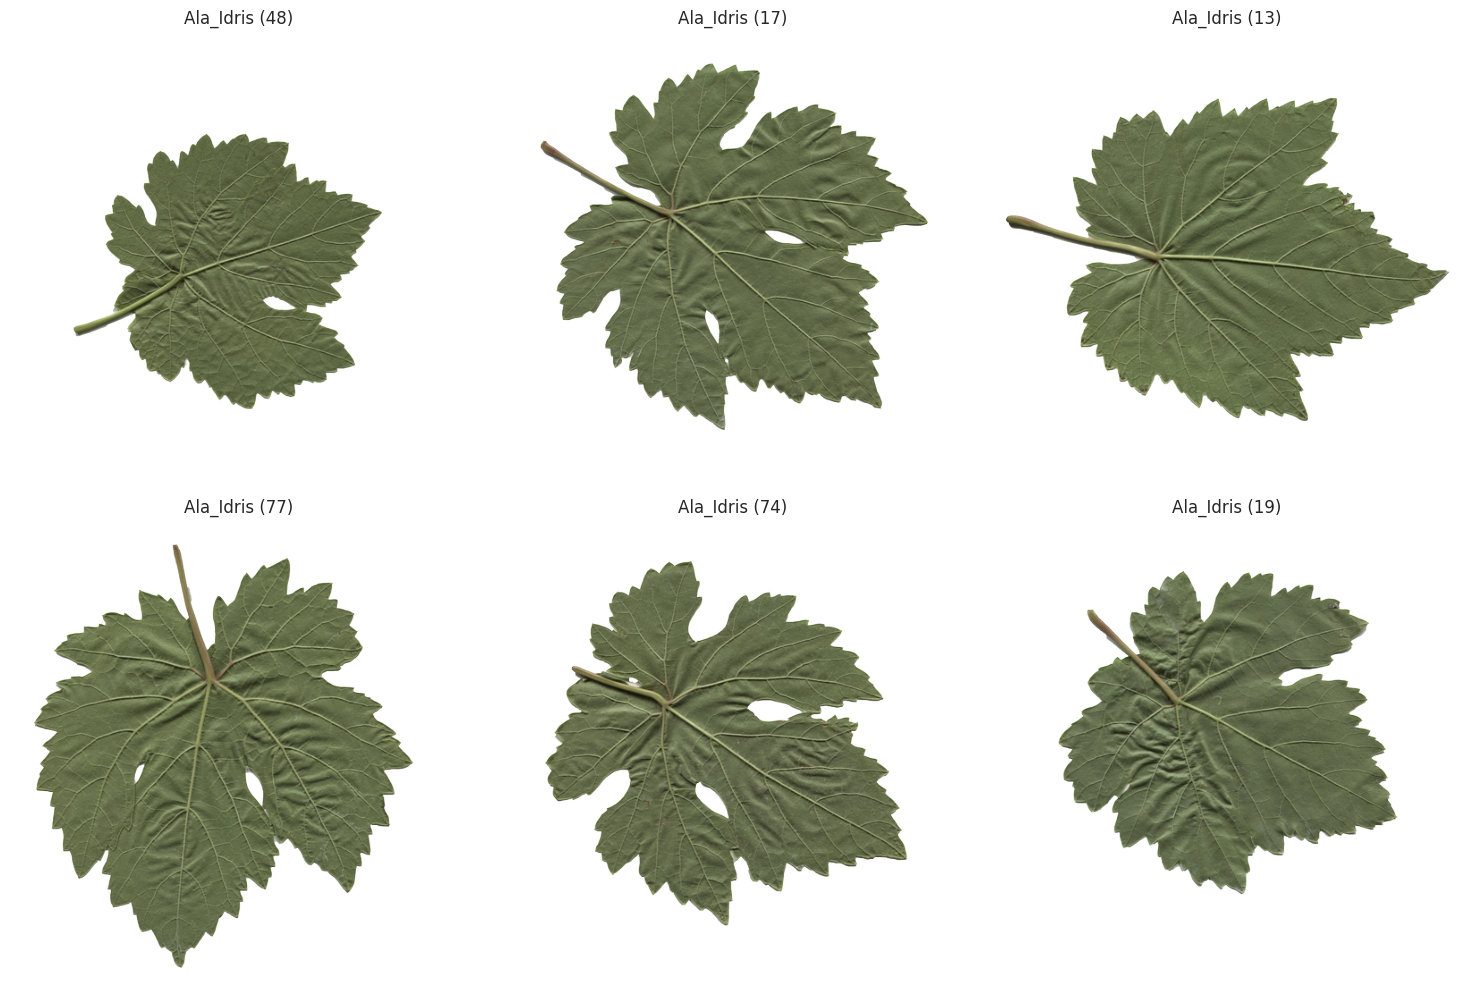

In [6]:
# Path to the directory containing images
path = "/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Ala_Idris"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

In [7]:
#Data_Dir
data_dir = '/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset'

print('Training Images:')
# Creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(256, 256),
    batch_size=32)

# Testing Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(256, 256),
    batch_size=32)

# Train Data 
#train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
#validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

Training Images:
Found 500 files belonging to 5 classes.
Using 400 files for training.
Validation Images:
Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [8]:
#def process(image,label):
    #tf.cast(image/255,tf.float32)
    #return image,label
#train = train_ds.map(process)
#test = validation_ds.map(process)

In [9]:
#for image, label in train.take(1):
    #print(image.shape, label.shape)

In [10]:
#for image, label in test.take(1):
    #print(image.shape, label.shape)

In [11]:
splitfolders.ratio("/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset",
                  output="dataset",
                  seed=7,
                  ratio=(0.8,0.1,0.1))

Copying files: 500 files [00:05, 93.38 files/s] 


In [12]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [13]:
train=train_datagen.flow_from_directory("dataset/train",
                                       target_size=(200,200),
                                       color_mode="rgb",
                                       class_mode="categorical",
                                       batch_size=110)
valid_dataset = valid_datagen.flow_from_directory('./dataset/val',
                                                  target_size=(200, 200),
                                                  class_mode='categorical',
                                                  batch_size=110,
                                                  color_mode='rgb',
                                                  )
test=test_datagen.flow_from_directory("dataset/test",
                                     target_size=(200,200),
                                     color_mode="rgb",
                                     class_mode="categorical",
                                     batch_size=110)

Found 400 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [14]:

model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=train.image_shape ), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),  # hidden layers 
    
    
    tf.keras.layers.Dense(5, activation='softmax'),
 
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
import keras  
tf.keras.losses.CategoricalCrossentropy
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
    
model.compile(optimizer='adam', loss="Crossentropy", metrics=METRICS)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,115,717 (19.51 MB)

 Trainable params: 5,115,717 (19.51 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_fit=model.fit(train,validation_data=valid_dataset,
                    steps_per_epoch=3,
                   epochs=30)


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - accuracy: 0.2157 - loss: 3.0772 - precision: 0.1295 - recall: 0.0591 - val_accuracy: 0.2000 - val_loss: 1.6217 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
1/3 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.2091 - loss: 1.6033 - precision: 0.0000e+00 - recall: 0.0000e+00

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 614ms/step - accuracy: 0.2091 - loss: 1.6033 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 1.6102 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.2091 - loss: 1.6096 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 1.6092 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 613ms/step - accuracy: 0.1818 - loss: 1.6097 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2400 - val_loss: 1.6089 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.2639 - loss: 1.6083 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 1.6098 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 615ms/step - accuracy: 0.1364 - loss: 1.6178 - precision: 0.0000e+00 - recall: 0

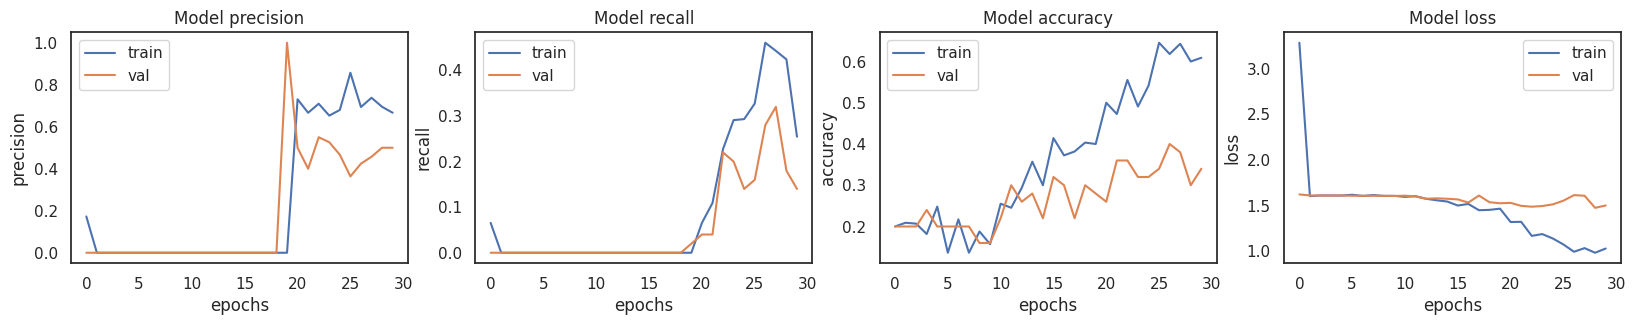

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(model_fit.history[met])
    ax[i].plot(model_fit.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])